# **TITANIC SURVIVAL PREDICTION**

**Libraries to build and evaluate machine learning model**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**Loading the Titanic dataset into a DataFrame called df_train**

In [4]:
df_train = pd.read_csv('Titanic-Dataset.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Feature engineering for modification of DataFrame**

> **creating new features like FamilySize, IsAlone, and Title to give your model more information to work with**

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

In [7]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IsAlone Title  
0      0         A/5 21171   7.2500   NaN        S           2        0    Mr  
1      0          PC 17599  71.2833   C85        C           2        0   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S           1        1  Miss  


**Analyzing final DataFrame**

In [8]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602    0.602694  
std      0.806057   49.693429    1.613459    0.489615  
min      0.000000    0.000000    1.000000    0.000000  
25%      0.000000    7.910400    1.000000    0.000000  
50%      0.000000   14.454200    

In [9]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int32  
 14  Title        891 non-null    object 
dtypes: float64(2), int32(1), int64(6), object(6)
memory usage: 101.1+ KB
None


>> **These plots help's in understanding the distribution of different features in the dataset**

**Visualizing Survival column (Target Variable)**

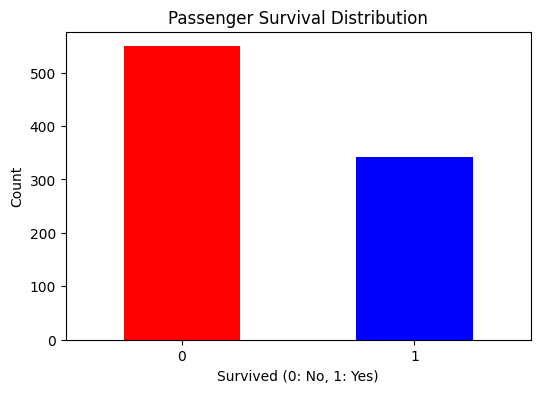

In [10]:
plt.figure(figsize=(6, 4))
df_train['Survived'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Passenger Survival Distribution')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Gender Distribution Visualization**

Text(0, 0.5, 'Count')

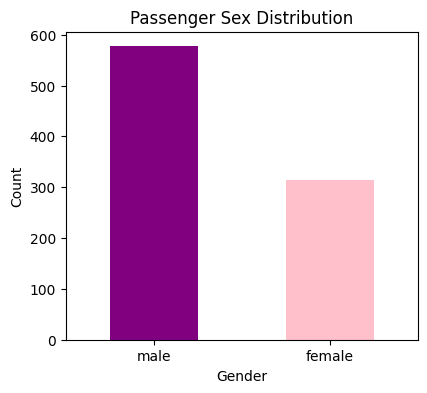

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df_train['Sex'].value_counts().plot(kind='bar', color=['purple', 'pink'])
plt.title('Passenger Sex Distribution')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')

**Visualisation of Passenger Embarkation Distribution**

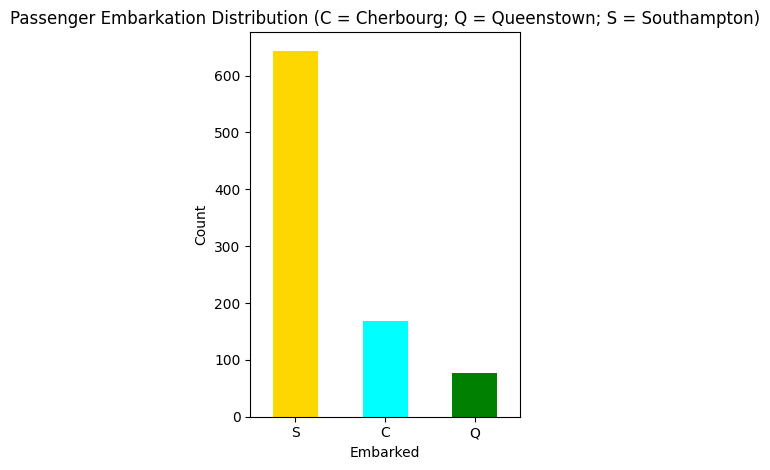

In [12]:
plt.subplot(1, 2, 2)
df_train['Embarked'].value_counts().plot(kind='bar', color=['gold', 'cyan', 'green'])
plt.title('Passenger Embarkation Distribution (C = Cherbourg; Q = Queenstown; S = Southampton)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Check for missing values**


> **Identifying any missing values in the dataset.**

In [13]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
IsAlone          0
Title            0
dtype: int64


**Missing Values in Percentages**

In [14]:
missing_values_df = (df_train.isnull().sum() / len(df_train)) * 100
print(missing_values_df.to_frame('Percentage Missing').sort_values(by='Percentage Missing', ascending=False))

             Percentage Missing
Cabin                 77.104377
Age                   19.865320
Embarked               0.224467
PassengerId            0.000000
Survived               0.000000
Pclass                 0.000000
Name                   0.000000
Sex                    0.000000
SibSp                  0.000000
Parch                  0.000000
Ticket                 0.000000
Fare                   0.000000
FamilySize             0.000000
IsAlone                0.000000
Title                  0.000000


**Preprocessing**

> **setting up pipelines to handle missing values and scale numeric features, and to encode categorical features.**

In [15]:
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_features = ['Sex', 'Embarked', 'Title', 'IsAlone']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

**Splitting the data**

> **splitting your data into training and validation sets**

In [16]:
X = df_train[numeric_features + categorical_features]
y = df_train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Model pipeline**

> **creating a pipeline that first preprocesses the data and then applies the Gradient Boosting Classifier**

In [17]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

**Hyperparameter tuning**

> **using GridSearchCV to find the best hyperparameters for your model**

In [18]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'FamilySize']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_...nore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Title',
                                                                          'IsAlone'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

**Best model**

> **selecting the best model based on the grid search**

In [19]:
best_model = grid_search.best_estimator_

#### *Predictions and Evaluation*


> **Evaluating your model’s performance using various metrics**

In [20]:
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

In [21]:
print("Accuracy:", accuracy, " - ", round(accuracy * 100, 2), "%")
print("Precision:", precision, " - ", round(precision * 100, 2), "%")
print("Recall:", recall, " - ", round(recall * 100, 2), "%")
print("F1 Score:", f1, " - ", round(f1 * 100, 2), "%")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8324022346368715  -  83.24 %
Precision: 0.8235294117647058  -  82.35 %
Recall: 0.7567567567567568  -  75.68 %
F1 Score: 0.7887323943661971  -  78.87 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Cross-validation**

> **Cross-validation helps you understand how well your model performs across different subsets of the data.**

In [22]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Accuracy: 0.836137091205825
